# Python Pearls


A survey of stdlib favorites and what you need to know to grok Python

## Bio

- self-taught software engineer

- ~10 years of self study, experimentation, and _FAILURE_

- career switcher

- insecurity, impostor syndrome, validity

## Questions

- What does it mean to grok Python?

> grok: to understand profoundly and intuitively[^1]


[^1]: <http://www.merriam-webster.com/dictionary/grok>

- Am I fooling myself, or do I really know this stuff?

- Can I capture (and share) the answers to these questions?

## Gather Data from People I Respect

1. How long did you program in Python before you felt like you grokked it?
2. What is your favorite Python feature?
3. What feature do you consider to be a good proxy for general understanding of Python?

## Results

In [67]:
years_before_grok =[1, 1, 3, 5, 7]
avg = sum(years_before_grok)/len(years_before_grok)
print(avg)

3.4


In [68]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


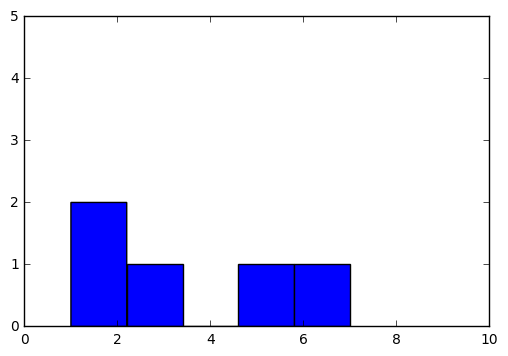

In [69]:
n, bins, patches = plt.hist(years_before_grok, 5)
plt.axis([0,10,0,5])
plt.show()

    1.  Avg: 3.4 years, Min: 1 week, Max: ~20years

    2.  generators, list comprehensions, decorators

    3.  generators, decorators, context managers

## Topics to Grok Python

- list comprehensions

- decorators

- context managers

- iterators and generators

##  `('{} comprehensions'.format(x) for x in [set, list, dict])`

- compact idioms to build containers (lists, sets, dictionaries)

- can replace many for loops with a single line

- also the preferred way to filter lists

In [70]:
lines = []
with open('somefile.txt', 'r') as f:
    for line in f:
        lines.append(line.strip().lower())
        
print(lines[:2])

['lorem ipsum dolor sit amet, consectetur adipiscing elit. sed sit amet vestibulum quam, sit amet euismod lorem. morbi ut leo neque. morbi dui risus, ullamcorper non venenatis ac, vehicula in tortor. phasellus luctus sit amet elit nec porttitor. donec ornare volutpat condimentum. vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; suspendisse quis luctus purus. nulla vehicula, neque ac porttitor suscipit, magna purus vehicula justo, quis vulputate mauris nulla quis erat. praesent nisl lectus, tincidunt a rutrum ut, pretium quis quam. integer malesuada suscipit eros et dignissim.', '']


In [71]:
with open('somefile.txt', 'r') as f:
    lines = [line.strip().lower() for line in f if line != '\n']
print(lines[:2])

['lorem ipsum dolor sit amet, consectetur adipiscing elit. sed sit amet vestibulum quam, sit amet euismod lorem. morbi ut leo neque. morbi dui risus, ullamcorper non venenatis ac, vehicula in tortor. phasellus luctus sit amet elit nec porttitor. donec ornare volutpat condimentum. vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; suspendisse quis luctus purus. nulla vehicula, neque ac porttitor suscipit, magna purus vehicula justo, quis vulputate mauris nulla quis erat. praesent nisl lectus, tincidunt a rutrum ut, pretium quis quam. integer malesuada suscipit eros et dignissim.', 'suspendisse ultrices felis leo, sit amet auctor mauris vehicula eget. quisque sem elit, porttitor mollis est eget, porta congue turpis. vestibulum eleifend gravida erat, eu fermentum mi. cras et sapien imperdiet sapien facilisis dapibus. donec eu sapien a arcu luctus vulputate hendrerit

- Also works for dictionaries and sets!

In [72]:
nums = range(25)
evens_and_odds = {i:'even' if not i % 2 else 'odd' for i in nums}
print(evens_and_odds)

{0: 'even', 1: 'odd', 2: 'even', 3: 'odd', 4: 'even', 5: 'odd', 6: 'even', 7: 'odd', 8: 'even', 9: 'odd', 10: 'even', 11: 'odd', 12: 'even', 13: 'odd', 14: 'even', 15: 'odd', 16: 'even', 17: 'odd', 18: 'even', 19: 'odd', 20: 'even', 21: 'odd', 22: 'even', 23: 'odd', 24: 'even'}


In [88]:
import random
rand_list = [random.randint(1, 10) for _ in range(100)]
rand_set = {random.randint(1, 10) for _ in range(100)}
print(len(rand_list))
deduped = set(rand_list)
print(deduped)
print(len(rand_set))

100
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
10


## @decorator

- a _decorator_ is a function that accepts a function as an argument

- It can alter the function's behavior, cache frequently accessed information, or produce side effects

- Really useful for DRYing up your code

- Common pattern in many web frameworks (Flask, Pyramid, et al)

- First class functions and _closures_

In [74]:
def outer_func(func):
    
    def _wrapper(*args, **kwargs):
        print('I wrapped your function')
        func(*args, **kwargs)
        print('Done with wrapper...\n')
    
    return _wrapper

def inner_func(msg='Inside the wrapped function'):
    print(msg)
    

decorated = outer_func(inner_func)
decorated()
decorated('Same decorator, different message!')


I wrapped your function
Inside the wrapped function
Done with wrapper...

I wrapped your function
Same decorator, different message!
Done with wrapper...



- @ sign is just 'syntactic sugar'

In [75]:
@outer_func
def inner_func(msg='Inside the wrapped function'):
    print(msg)
    

inner_func()
inner_func('Same decorator, different message!')


I wrapped your function
Inside the wrapped function
Done with wrapper...

I wrapped your function
Same decorator, different message!
Done with wrapper...



## `with ContextManagers():`

- context managers create and manage a context for a finite portion of code

- Typical pattern: setup, do work, tear down

- Create resources, connections, files, etc

- `with` keyword

### Examples

In [76]:
with open('somefile.txt') as f:
    print(type(f))
f.read()

<class '_io.TextIOWrapper'>


ValueError: I/O operation on closed file.

In [77]:
PATH = '/tmp/pyladies'
with open(os.path.join(PATH, 'hello.txt'), 'w') as f:
    f.write('This should fail')

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/pyladies/hello.txt'

### The Classic Way

In [79]:
import shutil

class Pyladies:
    """demonstration class only
      - coded for clarity, not efficiency
    """
    def __enter__(self):
        if os.path.exists(PATH):
            shutil.rmtree(PATH)
        os.mkdir(PATH)
        
    def __exit__(self, type, value, traceback):
        shutil.rmtree(PATH)

assert not os.path.exists(PATH)
with Pyladies():
    with open(os.path.join(PATH, 'hello.txt'), 'w') as f:
        f.write('context managers are cool\n')
    assert os.path.exists(PATH)
assert not os.path.exists(PATH)

## The Easier Way

In [80]:
from contextlib import contextmanager

@contextmanager
def pyladies():
    try:
        if os.path.exists(PATH):
            shutil.rmtree(PATH)
        os.mkdir(PATH)
        yield
    finally:
        shutil.rmtree(PATH)
        
with pyladies():
    assert os.path.exists(PATH)
assert not os.path.exists(PATH)

## Iterables, Iterators, & Generators

- an _iterable_ implements a magic method that returns an _iterator_ (you can call `iter()` on the object)

- an _iterator_ iplements a magic method that returns items in sequence (you can call `next()` on the object

- iterators allow you to use the `for x in y` syntax

In [81]:
s = 'pyladies atl'
it = iter(s)
for i in range(len(s)):
    print(next(it))

next(it)

p
y
l
a
d
i
e
s
 
a
t
l


StopIteration: 

In [82]:
for c in s:
    print(c)

p
y
l
a
d
i
e
s
 
a
t
l


## Generators

- following samples shamelessly lifted from _Fluent Python_[^2]


[^2]: <https://www.amazon.com/Fluent-Python-Luciano-Ramalho-ebook/dp/B0131L3PW4>

In [84]:
import re
import reprlib

RE_WORD = re.compile('\w+')


class Sentence:

    def __init__(self, text):
        self.text = text
        self.words = RE_WORD.findall(text)

    def __repr__(self):
        return 'Sentence(%s)' % reprlib.repr(self.text)

    def __iter__(self):
        return SentenceIterator(self.words)


class SentenceIterator:

    def __init__(self, words):
        self.words = words  
        self.index = 0  

    def __next__(self):
        try:
            word = self.words[self.index]   
        except IndexError:
            raise StopIteration()   
        self.index += 1 
        return word 

    def __iter__(self):
        return self

In [85]:
with open('somefile.txt') as f:
    s = Sentence(f.read())
    for i,w in enumerate(s):
        if i >= 9:
            break
        print(w)

Lorem
ipsum
dolor
sit
amet
consectetur
adipiscing
elit
Sed


In [86]:
import re
import reprlib

RE_WORD = re.compile('\w+')


class Sentence:

    def __init__(self, text):
        self.text = text

    def __repr__(self):
        return 'Sentence(%s)' % reprlib.repr(self.text)

    def __iter__(self):
        return (match.group() for match in RE_WORD.finditer(self.text))

In [87]:
with open('somefile.txt') as f:
    s = Sentence(f.read())
    for i, w in enumerate(s):
        if i >= 9:
            break
        print(w)

Lorem
ipsum
dolor
sit
amet
consectetur
adipiscing
elit
Sed


## Questions?